In [4]:
# This Python 3 environment comes with many helpful analytics Libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to Load in

import numpy as np # Linear algebra
import pandas as pd # data processing, csv file I/0 (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the " .. /input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

C:\Users\Huawei\AppData\Local\Temp\ipykernel_4768\1727383728.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Load and Check Data

In [5]:
train_df = pd.read_csv("Titanic-Dataset.csv")
# test_df - pd.read_csv("/kaggle/input/titanic/test.csv")
# test_PassengerId = test_df["PassengerId"]

In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Variable Description

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Univerate Variable Analysis

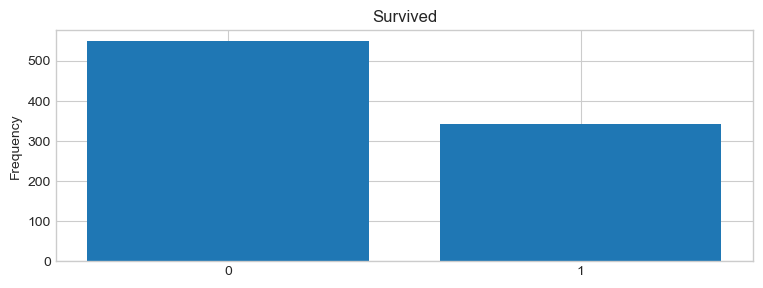

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


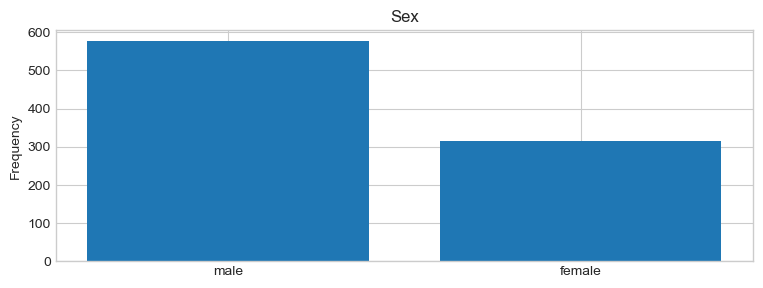

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


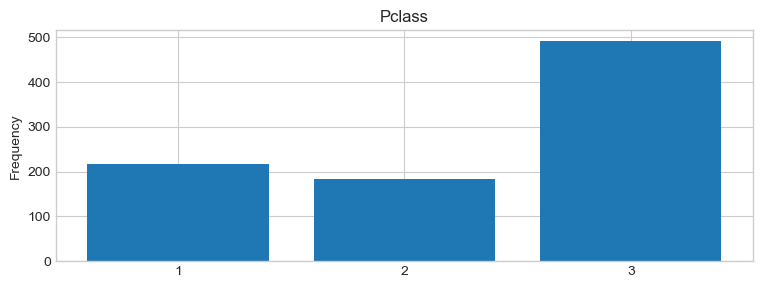

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


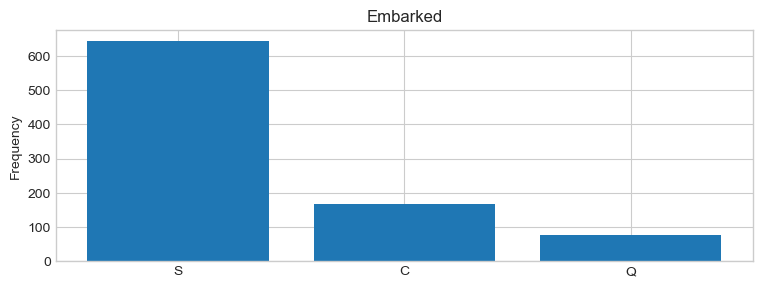

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


KeyError: 'sibSp'

In [10]:
# CATEGORICAL VARIABLE
def bar_plot(variable):
    """
    input: variable ex: "Sex"
    output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

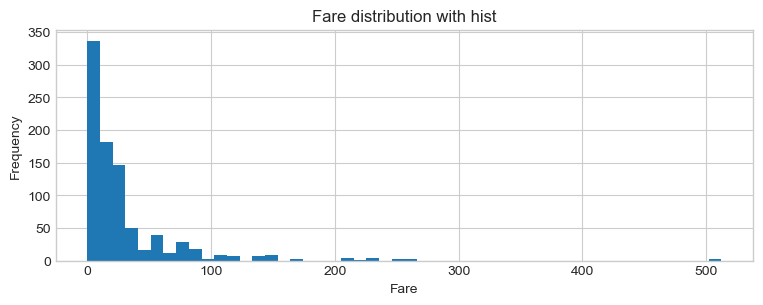

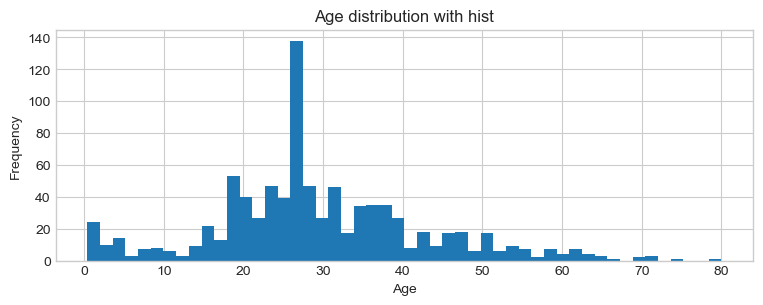

KeyError: 'Id'

<Figure size 900x300 with 0 Axes>

In [87]:
# NUMERIC VARIABLES
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

numericVar = ["Fare", "Age","Id"]
for n in numericVar:
    plot_hist(n)

In [ ]:
# Plcass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)


In [11]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index= False).mean().sort_values(by="Survived",ascending = False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
# Sibsp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index= False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Outlier Analysis

In [14]:
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | 
                              (df[c] > Q3+ outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [15]:
train_df.loc[detect_outliers(train_df, ["Age","SibSp","Parch", "Fare"]) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [16]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df, 
            ["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

# Missing Values

In [17]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [18]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [19]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


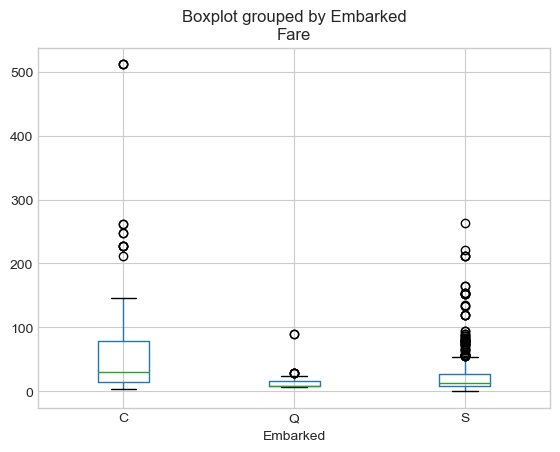

In [20]:
train_df.boxplot(column="Fare",by="Embarked")
plt.show()

In [21]:
train_df["Embarked"] = train_df["Embarked"].fillna("c")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [22]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(
    train_df[train_df["Pclass"] == 3]["Fare"]))

In [23]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Visualization

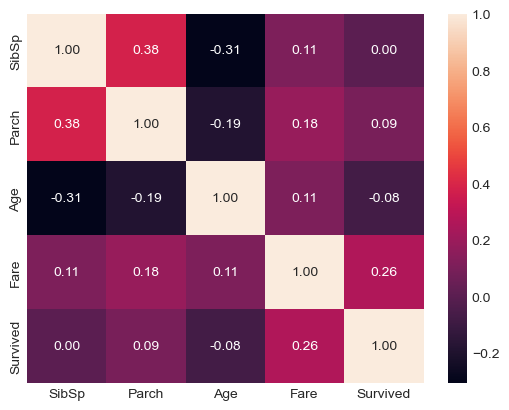

In [24]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

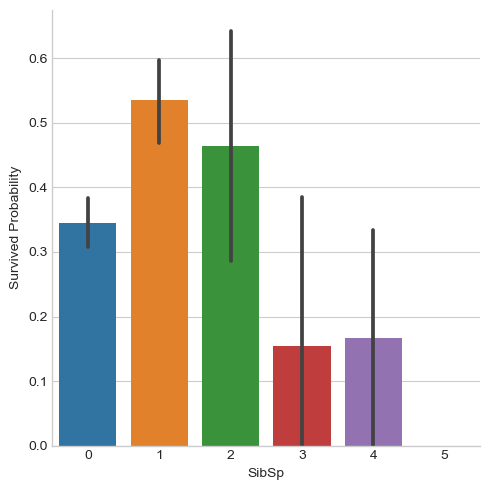

In [25]:
g = sns.catplot(x = "SibSp", y = "Survived", 
                data = train_df, kind = "bar")
g.set_ylabels("Survived Probability")
plt.show()

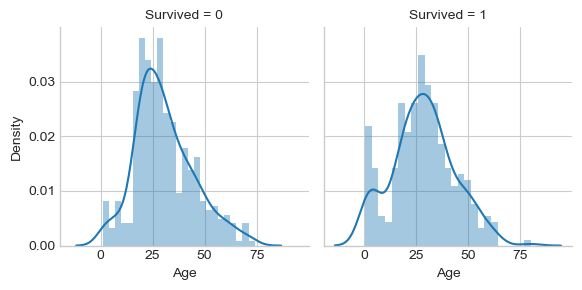

In [26]:
g = sns. FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

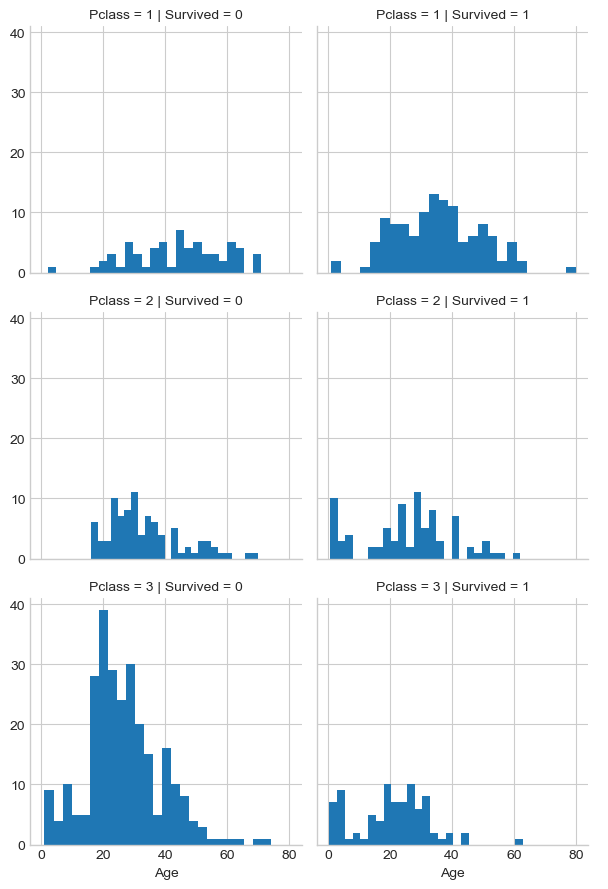

In [27]:
g = sns. FacetGrid(train_df, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age", bins = 25)
g.add_legend ()
plt.show()

# Filling Missing Value: Age

In [28]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
840,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
850,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
858,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
868,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


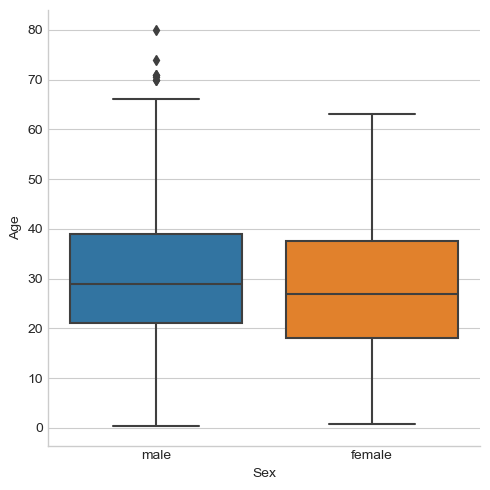

In [29]:
sns.catplot(x="Sex",y="Age",data=train_df, kind="box")
plt.show()

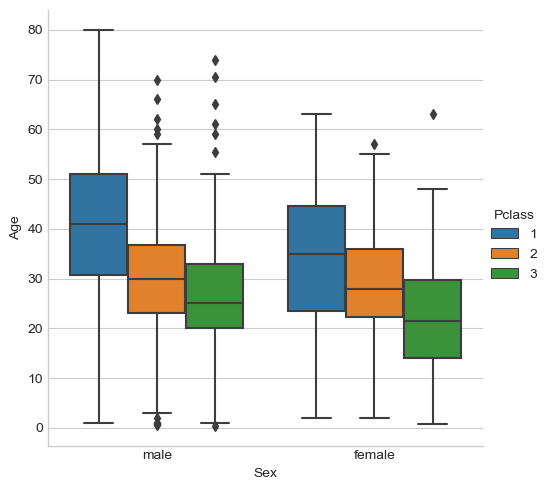

In [30]:
sns.catplot(x="Sex",y="Age",hue="Pclass",data=train_df, kind="box")
plt.show()


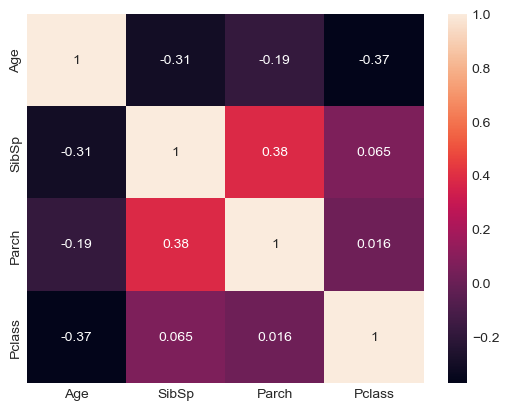

In [31]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

In [32]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]
        ["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])&
        (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"]. iloc[i] = age_med

In [33]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Feature Engineering

In [34]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [35]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() 
                     for i in name]

train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

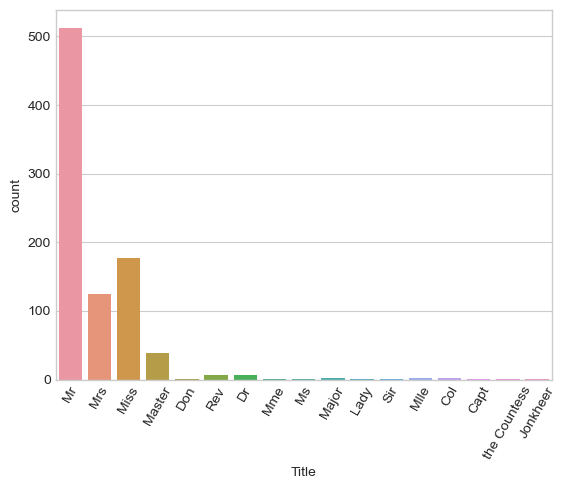

In [36]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [37]:
# convert to categorical
train_df["Title"] =train_df["Title"].replace(["Lady",
"the Countess","Capt","Col","Don","Dr","Major","Rev","Sir",
"Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if 
    i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" 
    else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

           

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

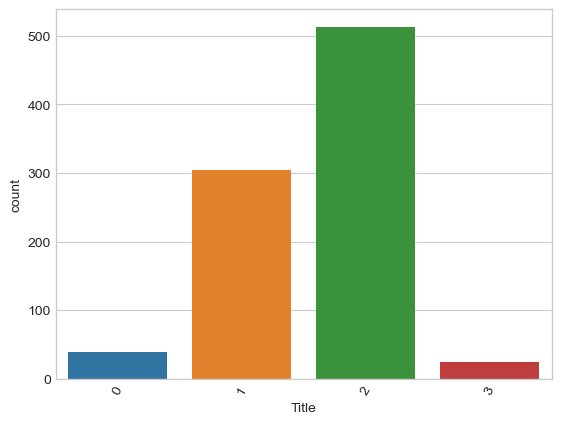

In [38]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

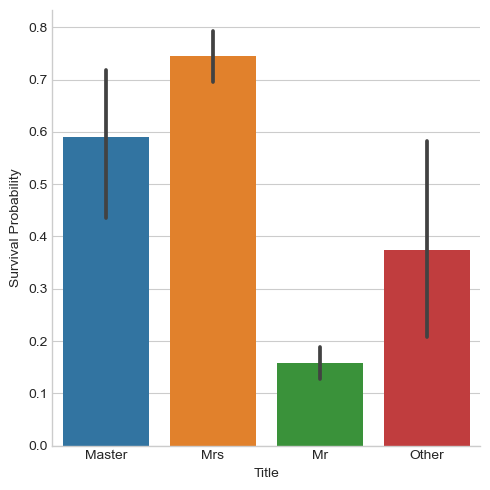

In [39]:
g = sns. catplot(x = "Title", y = "Survived", data = train_df, 
                 kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [40]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [41]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


# Family Size

In [42]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


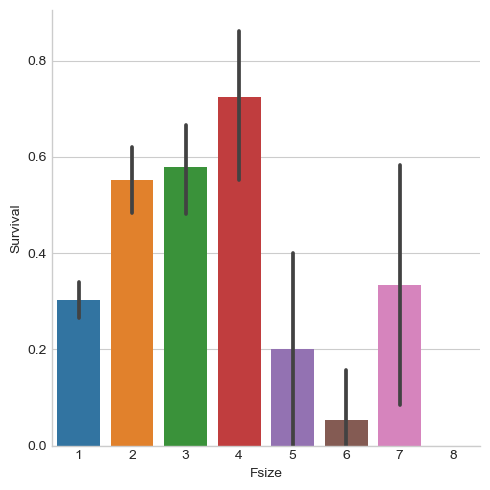

In [43]:
g = sns.catplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [44]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1
5,6,0,3,male,26.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,1
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1,1
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,1,0,0,0,5,0
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,0,1,0,0,3,1
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0,2,1


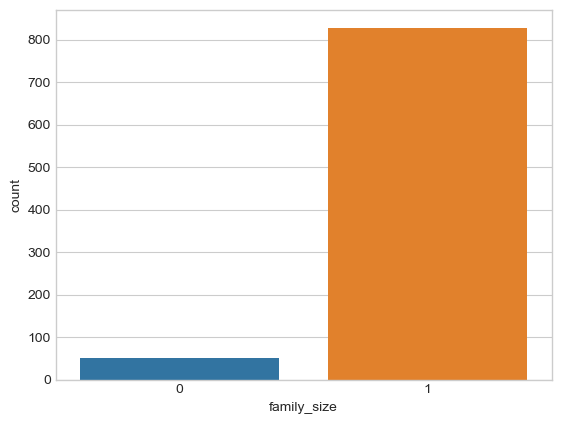

In [45]:
sns.countplot(x="family_size",data= train_df)
plt.show()

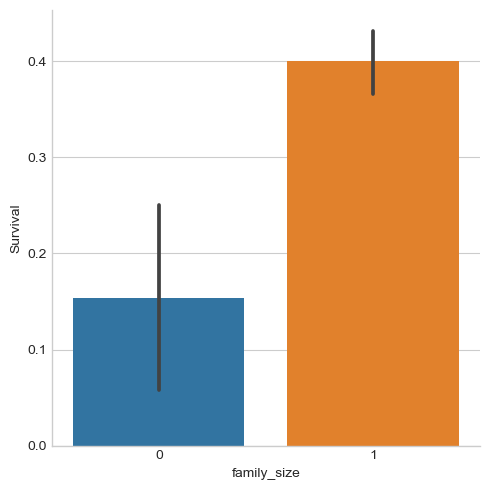

In [46]:
g = sns.catplot(x = "family_size", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [47]:
train_df = pd.get_dummies(train_df, columns=["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


# Embarked

In [48]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

<Axes: xlabel='Embarked', ylabel='count'>

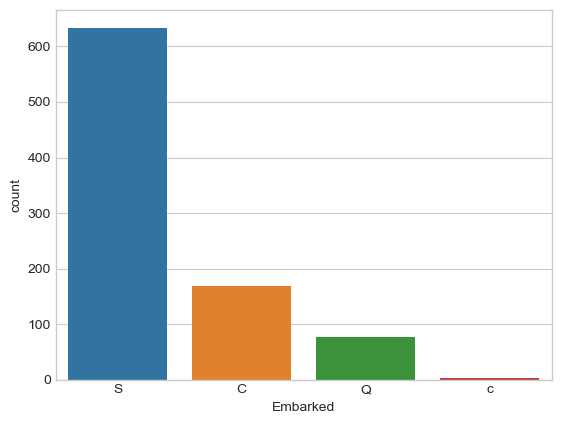

In [49]:
sns.countplot(x = "Embarked",data=train_df)

In [50]:
train_df = pd.get_dummies(train_df,columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S,Embarked_c
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,1,0,2,0,1,0,0,1,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,2,0,1,1,0,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1,0,0,1,0,1,0,0,1,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,...,1,0,0,2,0,1,0,0,1,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,...,0,1,0,1,0,1,0,0,1,0


# Ticket

In [51]:
a = "A/5. 2151"
a.replace("."," ").replace("/","").strip().split(" ")[0]

'A5'

In [52]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets. append("x")

train_df["Ticket"] = tickets

train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [53]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T")
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
0,1,0,3,male,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,female,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,female,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,3,male,26.0,0,0,8.4583,NaN,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0,1,male,54.0,0,0,51.8625,E46,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0,3,male,2.0,3,1,21.0750,NaN,1,...,0,0,0,0,0,0,0,0,0,1
8,9,1,3,female,27.0,0,2,11.1333,NaN,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1,2,female,14.0,1,0,30.0708,NaN,0,...,0,0,0,0,0,0,0,0,0,1


# Pclass

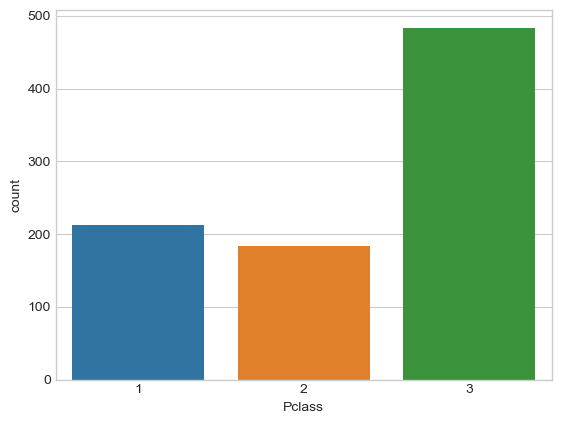

In [54]:
sns.countplot(x="Pclass",data=train_df)
plt.show()

In [55]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0,male,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,female,26.0,0,0,7.9250,NaN,0,1,...,0,0,1,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0,male,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


# Sex

In [56]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1,26.0,0,0,7.9250,NaN,0,1,0,...,1,0,0,0,0,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [57]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_c', 'T_A4', 'T_A5',
       'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE',
       'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW',
       'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2',
       'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2', 'T_SWPP', 'T_WC', 'T_WEP',
       'T_x', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

In [58]:
"""End of Feature Engineering"""

'End of Feature Engineering'

# Modeling

In [59]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train - Test Split

In [62]:
train = train_df[:len(train_df)]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("x_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 590
x_test 291
y_train 590
y_test 291


# Logistic Regression

In [65]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2)
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 82.54
Testing Accuracy: % 83.16


# Hyperparameter Tuning -- Grid Search -- Cross Validation

In [78]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
SVC(random_state = random_state),
RandomForestClassifier(random_state = random_state),
LogisticRegression(random_state = random_state),
KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
"max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
"gamma": [0.001, 0.01, 0.1, 1],
"C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
"min_samples_split":[2,3,10],
"min_samples_leaf":[1,3,10],
"bootstrap": [False],
"n_estimators": [100,300],
"criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
"penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype=int).tolist(),"weights": ["uniform","distance"],"metric": ["euclidean", "manhattan"]}

classifier_param = [dt_param_grid,
                    svc_param_grid,
                    rf_param_grid,
                    logreg_param_grid,
                    knn_param_grid]

In [79]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy",n_jobs = -1,verbose=1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7966101694915253
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8423728813559324
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8203389830508474
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7762711864406779


In [80]:
cv_results = pd.DataFrame({"Cross Validation Accuracy Means": cv_result, 
                           "ML Models": ["DecisionTreeClassifier", 
                                         "SVM", "RandomForest",
                                         "LogisticRegression",
                                         "KNeighborsclassifier"]})

cv_results

,Cross Validation Accuracy Means,ML Models
0,0.835593,DecisionTreeClassifier
1,0.796610,SVM
2,0.842373,RandomForest
3,0.820339,LogisticRegression
4,0.776271,KNeighborsclassifier


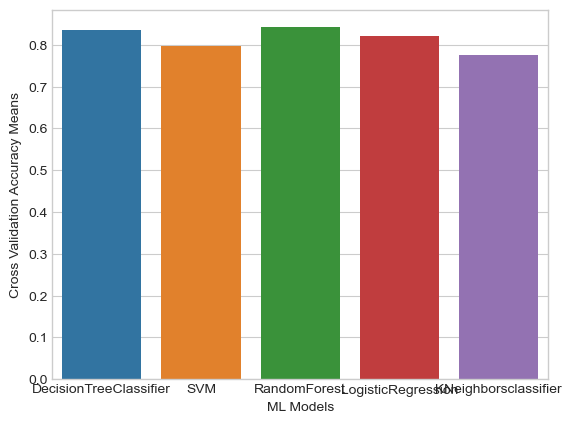

In [81]:
s = sns.barplot(cv_results, x="ML Models", y="Cross Validation Accuracy Means")

# Ensemble Modeling

In [85]:
votingC = VotingClassifier(estimators = [("dt", best_estimators[0]),
("rfc",best_estimators[2]),
("lr",best_estimators[3])], 
voting = "soft", n_jobs = -1)

votingC = votingC.fit(X_train, y_train)

print(accuracy_score(votingC.predict(X_test),y_test))

0.8213058419243986
